<a href="https://colab.research.google.com/github/NANDINIKeremegaladhoddiShivalingaiah/Airbnb-Exploratory-Data-Analysis-EDA-/blob/main/Airbnb_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Airbnb_NYC-Exploartory Data Analysis**


 **Project Type** - EDA

**Contribution** - Individual

**NAME** - NANDINI K S

#**Project Summary -**

**Data Preprocessing :**

1. Getting the dataset

2. Importing libraries

3. Loading datasets

4. About the Dataset

5. Understand the Variable

6. Data Exploration and Data Cleaning

5.Encoding Categorical Data

6.Data Cleaning and Feature Engineering

**Exploratory data analysis(EDA) :**


# **GitHub Link -**

https://github.com/NANDINIKeremegaladhoddiShivalingaiah/Airbnb-Exploratory-Data-Analysis-EDA-

# **Problem Statement**

1. Find the most popular neighborhoods for Airbnb rentals in New York City and How do prices and availability vary by neighborhood?

2. Finding the trends in terms of the number of listings, prices, or occupancy rates.

3. Which types of properties more popular or more expensive than others?

4.   Finding the correlation between price and other factors. 

5.   Which is the best area in New York City for a host to buy property at a good price rate and in an area with high traffic ?

6.   How do the minimum night of stay vary by neighborhood?

7.   How do the reviews of Airbnb rentals in New York City compare to their prices? Are higher-priced rentals more likely to have higher ratings?

8. Find the total numbers of Reviews and Maximum Reviews by Each Neighborhood Group.

9. Find the most reviewed room type in Neighborhood groups per month.

10. Find the top location listing location for travelers.

# **Data Overview**

id - unique_ID

name - names of the listing

host_id - unique host_Id

host_name - name of the listers

neighbourhood_group - location

neighbourhood - area

latitude - GPS cordinates

longitude - GPs cordinates

room_type - types of listing

price - price of listing

minimum_nights - minumum no of nights to be pay

number_of_reviews - number of reviews

last_review - last reviewed date

reviews_per_month - total reviews per month

calculated_host_listings_count - Total no of listing by host

# **Let's Begin !**

# **1. Know Your Data**

# Import Libraries

In [3]:
# Importing necessary libraries for analysing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset Loading

In [4]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Load Dataset
path = '/content/drive/MyDrive/Colab Notebooks/Projects-DATASCIENCE/EDA-AIRBNB/Airbnb NYC 2019.csv'
airbnb_df = pd.read_csv(path)

### Dataset First View

In [6]:
# Dataset First Look
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
airbnb_df.shape

(48895, 16)

### Dataset Information

In [8]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
airbnb_df.duplicated().sum()

0

In [10]:
print(f' We have {airbnb_df.duplicated().sum()} duplicate values in dataset.')

 We have 0 duplicate values in dataset.


### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
print(f'The number of missing values after cleaning the data are:')
airbnb_df.isna().sum().sort_values(ascending=False)

The number of missing values after cleaning the data are:


last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

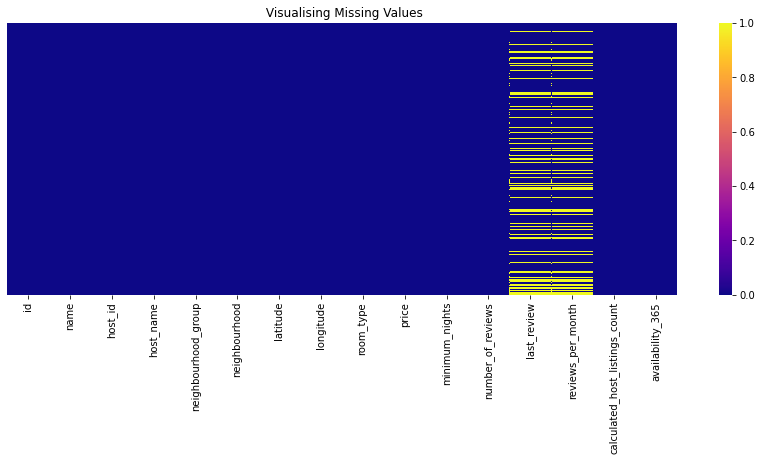

In [12]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(airbnb_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

The features like last_reviews and reviews_per_month have highest null values in the dataset. So we can drop those column as they are not sharing any useful data. since we have id's and names both are available.

host_name and listing_name doesn't have more missing/null values, Hence we can fill missing/null values with some substitute in both the columns.

In [13]:
# Filling missing values
airbnb_df['name'].fillna('Missedvalue', inplace = True)
airbnb_df['host_name'].fillna('Missedvalue', inplace =  True)

In [14]:
# Dropping the unncessary columns.
airbnb_df_new = airbnb_df.drop(['last_review','reviews_per_month'], axis =1)
airbnb_df_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [15]:
# Checking for null values in the new dataset
print(f'The number of missing values after cleaning the data are:')
airbnb_df_new.isnull().sum()

The number of missing values after cleaning the data are:


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

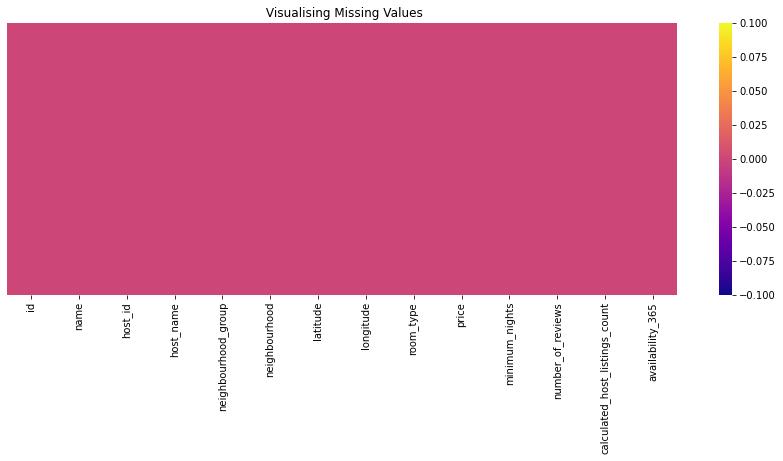

In [16]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(airbnb_df_new.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

Now, we don't have any missing values.

## **2. Understanding Your Variables**

In [ ]:
# checking the features name
print(f' The names of the features present in the dataset are: ')
list(airbnb_df_new.columns)

 The names of the features present in the dataset are: 


['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
#Checking for categorical columns
categorical_columns = airbnb_df_new.select_dtypes(include = 'object').columns
print(f' The following are the categorical features in the dataset: {list(categorical_columns)}')

 The following are the categorical features in the dataset: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']


In [ ]:
# Checking for numeric/ non categorical columns
numerical_columns = airbnb_df_new.select_dtypes(exclude = 'object').columns
print(' The following are the non categorical features in the dataset:') 
list(numerical_columns)

 The following are the non categorical features in the dataset:


['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365']

### Check Unique Values for each variable.

In [ ]:
#Checking the Unique value
print('The Unique Values of neighbourhood_group', airbnb_df_new['neighbourhood_group'].unique())
print('The Unique Values of room_type', airbnb_df_new['room_type'].unique())

The Unique Values of neighbourhood_group ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
The Unique Values of room_type ['Private room' 'Entire home/apt' 'Shared room']


# **Describe the Dataset and removing the outliers**

In [ ]:
# Dataset Describe
airbnb_df_new.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


The summary statistics shows us that the average price is 152.72, the average minimum nights stay is 7.03 nights, and the average number of reviews is 23.27 per listing. We also learnt that a host has an average of 7.14 places listed and availability averages 112.78 vacant days per year.

Most importantly, the min price is showing as zero and the max price as 10,000. Something isn't right with the data, so need to look into this issue and check for outliers.

About the Dataset – Airbnb Bookings
This Airbnb dataset contains nearly 49,000 observations from New York , with 16 columns of data.

The Data includes both categorical and numeric values, providing a diverse range of information about the listings.

This Dataset may be useful for analyzing trends and patterns in the Airbnb market in New York and also gain insights into the preferences and behavior of Airbnb users in the area.

This dataset contains information about Airbnb bookings in New York City in 2019. By analyzing this data, you may be able to understand the trends and patterns of Airbnb use in the NYC.

In [ ]:
#checking for outliers
airbnb_df_new.agg({'price':['mean','median','max','count']})

,price
mean,152.720687
median,106.000000
max,10000.000000
count,48895.000000


Previously we observed that the minimum value is zero, which does not make any sense since there are no free rooms on Airbnb and the maximum value is 10,000, which just seems too high. Notice how the mean is considerably higher than the median. This is an indication that the data is skewed.

Let's use a boxplot to get a better understanding of price distribution:

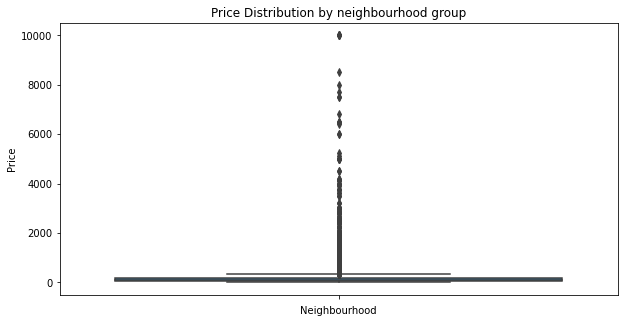

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=airbnb_df_new).set_title('Price Distribution by neighbourhood group')
sns.set_theme(style='white')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.show()

From the above box plot we can observe that the outliers are present in the data. Hence will remove the outliers using interquartile range.

In [ ]:
#Using IQR technique
q1 = airbnb_df['price'].quantile(0.25)
q3 = airbnb_df['price'].quantile(0.75)
iqr = q3-q1
lower_fence = q1-1.5*iqr
higher_fence = q3+1.5*iqr
print('q1 is', q1)
print('q3 is', q3)
print('The lower_fence is ', lower_fence)
print('The higher_fence is ', higher_fence)

q1 is 69.0
q3 is 175.0
The lower_fence is  -90.0
The higher_fence is  334.0


In [ ]:
#removing the values below lower_fence and above higher_fence
airbnb_df_new = airbnb_df_new.drop(airbnb_df_new[airbnb_df_new['price']<lower_fence].index)
airbnb_df_new = airbnb_df_new.drop(airbnb_df_new[airbnb_df_new['price']>higher_fence].index)

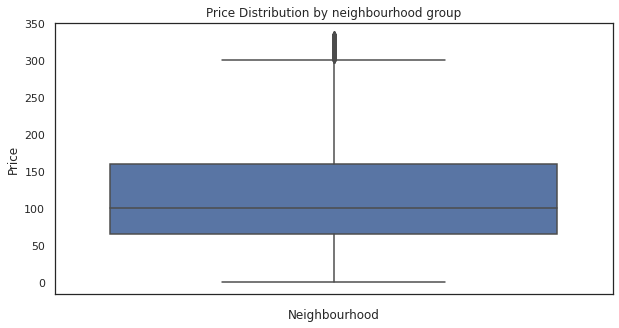

In [ ]:
#Lets create a new boxplot and check the result.
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=airbnb_df_new).set_title('Price Distribution by neighbourhood group')
sns.set_theme(style='white')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.show()

# **3. Data Wrangling**